## Intro to Regression

[intro desmos](https://www.desmos.com/calculator/ywloazwete)

Goals:
- use statsmodels to build a regression model
- use summary statistics to evaluate a model
- differentiate between corr, cov, and R squared

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

`.cov` , `.corr`

[link to dataset](https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/master/03%20Linear%20Regression%20in%202%20minutes/data.csv)

In [2]:
class_data=pd.read_csv('https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/master/03%20Linear%20Regression%20in%202%20minutes/data.csv', header=None)

In [3]:
class_data.columns= ["X","Y"]

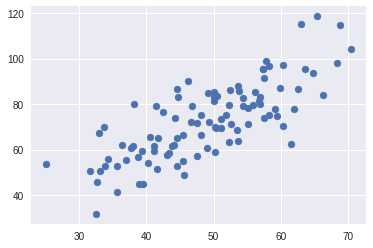

In [4]:
plt.scatter(class_data.X, class_data.Y)

In [5]:
f = "Y~X"

In [6]:
model = ols(formula=f, data=class_data).fit()

## Beginner
### Problem One: Chopsticks
#### Is chopstick length correlated with effectiveness?

In [7]:
chopsticks = pd.read_csv("http://blog.yhat.com/static/misc/data/chopstick-effectiveness.csv")

[Link to chopsticks study](https://www.ncbi.nlm.nih.gov/pubmed/15676839)

## Intermediate:
### Problem Three: Street price of weed
[reference](http://blog.yhat.com/posts/7-funny-datasets.html)

Has the price of weed been trending downward or upward over time? 
- overall?
- different in certain states?
- different qualities?

In [8]:
weed = pd.read_csv("http://blog.yhat.com/static/misc/data/marijuana-street-price-clean.csv")

In [9]:
weed.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


## Advanced
### DC housing
### Doing repeat OLS, which variables are related to housing price?

In [10]:
housing = pd.read_csv("https://drive.google.com/uc?export=download&id=1DsbpIf4_9CAKNd-B9gaML1WKOJcMne71")

/home/will/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
housing = housing.loc[housing.PRICE.isna()==False]
housing;

In [18]:
housingtemp=housing.loc[housing.NUM_UNITS.isna()==False]
housingtemp.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [19]:
f='PRICE~NUM_UNITS'

In [20]:
model = ols(formula=f, data=housingtemp).fit()

In [21]:
summary=model.summary()

In [22]:
model.rsquared

2.1974758790399562e-07

In [23]:
numeric_cols=[]
for col in housing:
    if housing[col].dtype=='float64' or housing[col].dtype=='int64':
        numeric_cols.append(col)
        

In [24]:
numeric_cols

['Unnamed: 0',
 'BATHRM',
 'HF_BATHRM',
 'NUM_UNITS',
 'ROOMS',
 'BEDRM',
 'AYB',
 'YR_RMDL',
 'EYB',
 'STORIES',
 'PRICE',
 'SALE_NUM',
 'GBA',
 'BLDG_NUM',
 'KITCHENS',
 'FIREPLACES',
 'USECODE',
 'LANDAREA',
 'CMPLX_NUM',
 'LIVING_GBA',
 'ZIPCODE',
 'LATITUDE',
 'LONGITUDE',
 'CENSUS_TRACT',
 'X',
 'Y']

In [25]:
rlist=[]
for col in numeric_cols:
    f= f"PRICE~{col}"
    housingtemp=housing.loc[housing[col].isna()==False]
    model = ols(formula=f, data=housingtemp).fit()
    rlist.append((col,model.rsquared))
    

In [27]:
rlist

[('Unnamed: 0', 2.220446049250313e-16),
 ('BATHRM', 4.2722673272987954e-05),
 ('HF_BATHRM', 0.000171953210127751),
 ('NUM_UNITS', 2.1974758790399562e-07),
 ('ROOMS', 0.0014623771837619648),
 ('BEDRM', 0.0018776023140734122),
 ('AYB', 0.0031405624692038003),
 ('YR_RMDL', 0.0009043234886986218),
 ('EYB', 0.0024628406679478854),
 ('STORIES', 0.0017924220862568507),
 ('PRICE', 1.0),
 ('SALE_NUM', 0.0002541537355978951),
 ('GBA', 0.36069173164623325),
 ('BLDG_NUM', 9.290985588439327e-06),
 ('KITCHENS', 0.0020442147956369894),
 ('FIREPLACES', 0.0005754905764313589),
 ('USECODE', 0.0006971848468145803),
 ('LANDAREA', 2.9783567771168862e-05),
 ('CMPLX_NUM', 0.0010881937655252694),
 ('LIVING_GBA', 0.0007347446311019024),
 ('ZIPCODE', 2.1535431448116427e-06),
 ('LATITUDE', 0.001980720919228074),
 ('LONGITUDE', 0.009072020705479855),
 ('CENSUS_TRACT', 0.004864057326399496),
 ('X', 0.009073080272972156),
 ('Y', 0.0019874268365380754)]